In [1]:
import pandas as pd
import glob
import re
import datetime 
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 50)
pd.options.display.max_colwidth = 100

In [3]:

li = []

for filename in glob.glob("data/*.csv"):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["year"] = [int(re.findall(r'\d+', filename)[0])]*len(df)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame['year_mon'] = frame.apply(lambda x: datetime.date(x.year,datetime.datetime.strptime(x.Month,"%B").month,1),axis =1)
frame['mon_int'] = frame.Month.apply(lambda x: datetime.datetime.strptime(x,"%B").month)

In [5]:
frame['date_numerical'] = frame.year_mon.map(datetime.datetime.toordinal)

In [6]:
all_brand = frame.groupby(['year','Month','year_mon'])['RentalCarGrossSales'].sum().reset_index()

### Total sales per month

<AxesSubplot:xlabel='year_mon', ylabel='RentalCarGrossSales'>

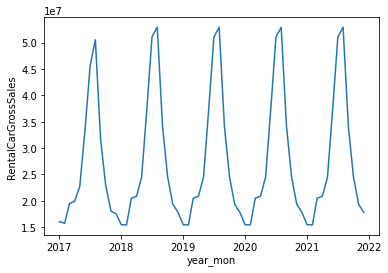

In [106]:
sns.lineplot(data=all_brand,x='year_mon',y='RentalCarGrossSales',ci=0.90)

<AxesSubplot:xlabel='date_numerical', ylabel='RentalCarGrossSales'>

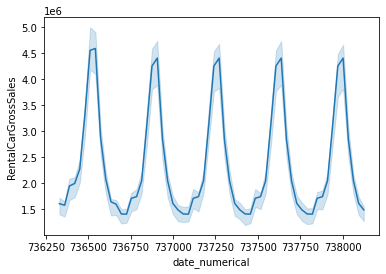

In [117]:
sns.lineplot(data=frame,x='date_numerical',y='RentalCarGrossSales',ci=20)

<AxesSubplot:xlabel='year', ylabel='RentalCarGrossSales'>

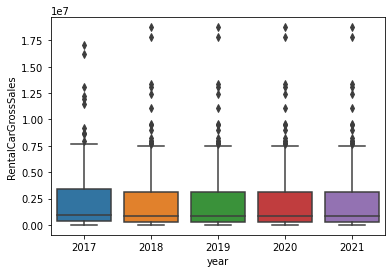

In [50]:
sns.boxplot(data=frame, x='year',y='RentalCarGrossSales')

<AxesSubplot:xlabel='RentalCarGrossSales', ylabel='Count'>

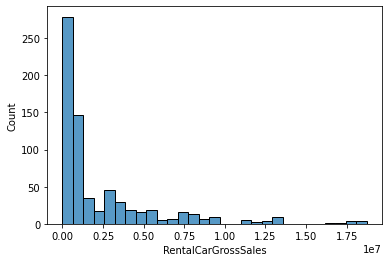

In [54]:
sns.histplot(frame.RentalCarGrossSales)

<AxesSubplot:xlabel='RentalCarGrossSales', ylabel='Count'>

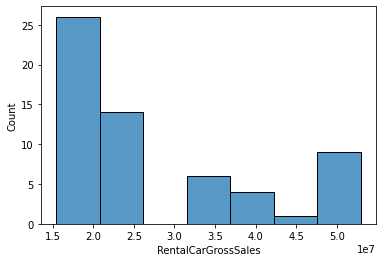

In [53]:
sns.histplot(all_brand.RentalCarGrossSales)

In [32]:
per_company = frame.groupby(['Company','year_mon']).agg({'RentalCarGrossSales':'sum'})

In [35]:
per_company

RentalCarGrossSales
Company                            year_mon                       
AVIS BUDGET Car Rental             2017-01-01              3453308
                                   2017-02-01              3735767
                                   2017-03-01              4581703
                                   2017-04-01              4785559
                                   2017-05-01              5445566
...                                                            ...
Zeeba WA, LLC dba Zeeba Rent-A-Van 2021-08-01                 2267
                                   2021-09-01                 2985
                                   2021-10-01                 1490
                                   2021-11-01                  248
                                   2021-12-01                 1098

[693 rows x 1 columns]

In [80]:
import pandas as pd
from predicthq import Client
import requests

ACCESS_TOKEN = '-'
phq = Client(access_token=ACCESS_TOKEN)

def get_place_hierarchy(latlong, token):
    # latlong = 'lat,lon'

    response = requests.get(
        url="https://api.predicthq.com/v1/places/hierarchies",
        headers={
          "Authorization": "Bearer " + token,
          "Accept": "application/json"
        },
        params={
            "location.origin": latlong
        }
    )

    return response.json()
def get_place_name(place_id,ACCESS_TOKEN):
    phq = Client(access_token=ACCESS_TOKEN)
    ny_state = phq.places.search(id=place_id).results[0]
    return ny_state.name

place_hierarchy = get_place_hierarchy('47.61091992161532,-122.33669224272333',ACCESS_TOKEN)

In [94]:
p = place_hierarchy['place_hierarchies'][0][4]['place_id']
p

'5799783'

In [95]:
get_place_name(p,ACCESS_TOKEN)

'King County'

In [97]:
from timezonefinder import TimezoneFinder
timezone = TimezoneFinder().timezone_at(lat=47.61091992161532, lng=-122.33669224272333)
print(timezone)

America/Los_Angeles


In [101]:
parameters = dict()
place_ids = [p]
parameters.update(place__scope=place_ids)

start_time = "2017-01-01"
end_time = "2021-12-31"
parameters.update(active__gte=start_time)
parameters.update(active__lte=end_time)
parameters.update(active__tz=timezone)

rank_type = "rank" # Set to be either "rank", "local_rank" or "aviation_rank".
rank_threshold = 40 
filter_parameter = "gte"
parameters.update({f"{rank_type}__{filter_parameter}": rank_threshold})

In [102]:
parameters

{'place__scope': ['5799783'],
 'active__gte': '2017-01-01',
 'active__lte': '2021-12-31',
 'active__tz': 'America/Los_Angeles',
 'rank__gte': 40}

In [103]:
results = []

# Iterating through all the events that match our criteria and adding them to our results
for event in phq.events.search(parameters).iter_all():
    results.append(event.to_dict())

# Converting the results to a DataFrame
event_df = pd.DataFrame(results)

In [109]:
event_df.to_csv('seattle_events.csv')

In [7]:
event_features = pd.read_csv('/Users/aisling/Documents/Crux/ElasticNet/1.csv')

In [121]:
event_features.head()

date  academic_exams_binary  academic_graduation_binary  \
0  2017-01-01                    0.0                         0.0   
1  2017-01-02                    0.0                         0.0   
2  2017-01-03                    0.0                         0.0   
3  2017-01-04                    0.0                         0.0   
4  2017-01-05                    0.0                         0.0   

   academic_holidays_binary  academic_session_attendance  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   academic_session_binary  attended_count  big_event_binary  \
0                      0.0             0.0               0.0   
1                      0.0             0.0               0.0   
2                      0.0             0.0               0.0   
3                      0.0             0.0               0.0   
4                      0.0             0.0               0.0   

   cultural_attendance  demand_surge_binary  large_events_attendance  \
0                  0.0                  0.0                      0.0   
1                  0.0                  0.0                      0.0   
2                  0.0                  0.0                      0.0   
3                  0.0                  0.0                      0.0   
4                  0.0                  0.0                      0.0   

   qdiscretized_att_bins  day_expo_attendance  multiday_attendance  \
0                      0                  0.0                  0.0   
1                      0                  0.0                  0.0   
2                      0                  0.0                  0.0   
3                      0                  0.0                  0.0   
4                      0                  0.0                  0.0   

   short_expo_attendance  observance_binary  school_holidays_binary  \
0                    0.0                0.0                     0.0   
1                    0.0                0.0                     0.0   
2                    0.0                0.0                     0.0   
3                    0.0                0.0                     0.0   
4                    0.0                0.0                     0.0   

   air_quality_rank  blizzard_rank  cold_wave_rank  cold_wave_snow_rank  \
0               0.0            0.0             0.0                  0.0   
1               0.0            0.0             0.0                  0.0   
2               0.0            0.0             0.0                  0.0   
3               0.0            0.0             0.0                  0.0   
4               0.0            0.0             0.0                  0.0   

   cold_wave_storm_rank  dust_rank  dust_storm_rank  flood_rank  ...  \
0                   0.0        0.0              0.0         0.0  ...   
1                   0.0        0.0              0.0         0.0  ...   
2                   0.0        0.0              0.0         0.0  ...   
3                   0.0        0.0              0.0         0.0  ...   
4                   0.0        0.0              0.0         0.0  ...   

   soccer_attendance_bin  sports_attendance_bin  tennis_attendance  \
0                      0                      0                0.0   
1                      0                      0                0.0   
2                      0                      0                0.0   
3                      0                      0                0.0   
4                      0                      0                0.0   

   cold_binary  disaster_binary  hot_binary  storm_binary  sports_sum  \
0          0.0              0.0         0.0           0.0      9259.0   
1          0.0              0.0         0.0           0.0         0.0   
2          0.0              0.0         0.0      

In [8]:
zero_features = []
for ix, val in (event_features.std() == 0).items():
    if val:
        zero_features.append(ix)
        print(ix)

air_quality_rank
blizzard_rank
cold_wave_rank
cold_wave_snow_rank
cold_wave_storm_rank
dust_rank
dust_storm_rank
flood_rank
heat_wave_rank
hurricane_rank
severe_weather_mobility_count
thunderstorm_rank
tornado_rank
tropical_storm_rank
boxing_attendance
boxing_attendance_bin
f1_attendance
f1_attendance_bin
horse_racing_attendance
horse_racing_attendance_bin
tennis_attendance
cold_binary
disaster_binary
hot_binary
storm_binary
master_id


/var/folders/3s/593hdkl926l026c4t92nlx7h0000gn/T/ipykernel_44994/141646575.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for ix, val in (event_features.std() == 0).items():


In [9]:
non_zero_event_features = event_features[[col for col in event_features.columns if not (col in zero_features)]].copy()

In [10]:
non_zero_event_features['date'] = pd.to_datetime(non_zero_event_features['date'])
non_zero_event_features['year'] = non_zero_event_features['date'].apply(lambda x: x.year)
non_zero_event_features['month'] = non_zero_event_features['date'].apply(lambda x: x.month)

In [11]:
phq_features = non_zero_event_features.groupby(['year','month']).sum().reset_index()

In [12]:
phq_features.head()

year  month  academic_exams_binary  academic_graduation_binary  \
0  2017      1                    0.0                         0.0   
1  2017      2                    0.0                         0.0   
2  2017      3                    0.0                         0.0   
3  2017      4                    0.0                         0.0   
4  2017      5                    0.0                         0.0   

   academic_holidays_binary  academic_session_attendance  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   academic_session_binary  attended_count  big_event_binary  \
0                      0.0             0.0               0.0   
1                      0.0             0.0               0.0   
2                      0.0             0.0               0.0   
3                      0.0             0.0               0.0   
4                      0.0             0.0               0.0   

   cultural_attendance  demand_surge_binary  large_events_attendance  \
0                  0.0                  0.0                      0.0   
1                  0.0                  0.0                      0.0   
2                  0.0                  0.0                      0.0   
3                  0.0                  0.0                      0.0   
4                  0.0                  0.0                      0.0   

   qdiscretized_att_bins  day_expo_attendance  multiday_attendance  \
0                      0                  0.0                  0.0   
1                      0                  0.0                  0.0   
2                      0                  0.0                  0.0   
3                      0                  0.0                  0.0   
4                      0                  0.0                  0.0   

   short_expo_attendance  observance_binary  school_holidays_binary  \
0                    0.0                0.0                     0.0   
1                    0.0                0.0                     0.0   
2                    0.0                0.0                     0.0   
3                    0.0                0.0                     0.0   
4                    0.0                0.0                     0.0   

   baseball_attendance  baseball_attendance_bin  basketball_attendance  \
0                  0.0                        0                    0.0   
1                  0.0                        0                    0.0   
2                  0.0                        0                    0.0   
3                  0.0                        0                    0.0   
4                  0.0                        0                    0.0   

   basketball_attendance_bin  soccer_attendance  soccer_attendance_bin  \
0                          0                0.0                      0   
1                          0                0.0                      0   
2                          0                0.0                      0   
3                          0                0.0                      0   
4                          0                0.0                      0   

   sports_attendance_bin  sports_sum  sports_count  conferences_sum  \
0                      0    185598.0          16.0           6650.0   
1                      0    120106.0          12.0          20454.0   
2                      0    133716.0          18.0         384877.0   
3                      0    376391.0          39.0          77006.0   
4                      0    536834.0          46.0          72822.0   

   conferences_count  expos_sum  expos_count  community_sum  community_count  \
0               31.0    39920.0         17.0       241157.0            179.0   
1               21.0   103681.0         17.0       111498.0            223.0   
2   

In [13]:
all_brand['mon'] = all_brand['year_mon'].apply(lambda x: x.month)

In [14]:
df = pd.merge(all_brand,phq_features,left_on=['year','mon'],right_on=['year','month'],how='left')

In [15]:
df.drop(['Month','year_mon','month'],axis=1,inplace=True)

In [16]:
df.sort_values(['year','mon'],inplace=True)

In [17]:
df['sales_last_mon'] = df.RentalCarGrossSales.shift(-1)

In [18]:
df.head(10)

year  RentalCarGrossSales  mon  academic_exams_binary  \
4   2017             16054808    1                    0.0   
3   2017             15746674    2                    0.0   
7   2017             19453321    3                    0.0   
0   2017             19951807    4                    0.0   
8   2017             22719960    5                    0.0   
6   2017             33441004    6                    0.0   
5   2017             45590885    7                    0.0   
1   2017             50539918    8                    0.0   
11  2017             31593570    9                    0.0   
10  2017             22948783   10                    0.0   

    academic_graduation_binary  academic_holidays_binary  \
4                          0.0                       0.0   
3                          0.0                       0.0   
7                          0.0                       0.0   
0                          0.0                       0.0   
8                          0.0                       0.0   
6                          0.0                       0.0   
5                          0.0                       0.0   
1                          0.0                       0.0   
11                         0.0                       0.0   
10                         0.0                       0.0   

    academic_session_attendance  academic_session_binary  attended_count  \
4                           0.0                      0.0             0.0   
3                           0.0                      0.0             0.0   
7                           0.0                      0.0             0.0   
0                           0.0                      0.0             0.0   
8                           0.0                      0.0             0.0   
6                           0.0                      0.0             0.0   
5                           0.0                      0.0             0.0   
1                           0.0                      0.0             0.0   
11                          0.0                      0.0             0.0   
10                          0.0                      0.0             0.0   

    big_event_binary  cultural_attendance  demand_surge_binary  \
4                0.0                  0.0                  0.0   
3                0.0                  0.0                  0.0   
7                0.0                  0.0                  0.0   
0                0.0                  0.0                  0.0   
8                0.0                  0.0                  0.0   
6                0.0                  0.0                  0.0   
5                0.0                  0.0                  0.0   
1                0.0                  0.0                  0.0   
11               0.0                  0.0                  0.0   
10               0.0                  0.0                  0.0   

    large_events_attendance  qdiscretized_att_bins  day_expo_attendance  \
4                       0.0                      0                  0.0   
3                       0.0                      0                  0.0   
7                       0.0                      0                  0.0   
0                       0.0                      0                  0.0   
8                       0.0                      0                  0.0   
6                       0.0                      0                  0.0   
5                       0.0                      0                  0.0   
1                       0.0                      0                  0.0   
11                      0.0                      0                  0.0   
10                      0.0                      0                  0.0   

    multiday_attendance  short_expo_attendance  observance_binary  \
4                   0.0                    0.0                0.0   
3                   0.0                    0.0                0.0   
7                   0.0                    0.0                0.0   
0    

In [235]:
upper_thresh = df.RentalCarGrossSales.quantile(.75)

# forecast
sales = last_mon_sales + mon + year + phq_events

Testing: 2019, 2021

In [270]:
from sklearn.model_selection import TimeSeriesSplit

X = df.loc[:,df.columns!='RentalCarGrossSales']
y = df.RentalCarGrossSales

tscv = TimeSeriesSplit(n_splits=2, test_size=12)


In [271]:
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[X.index==train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] TEST: [36 37 38 39 40 41 42 43 44 45 46 47]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55 56 57 58 59]


In [305]:
df = df.dropna()
df_train = df[(df.year<2019)|((df.year>2019)&(df.year<2021))].copy()
df_test = df[df.year.isin([2019,2021])].copy()

X_train,y_train = df_train.loc[:,df.columns!='RentalCarGrossSales'],df_train.RentalCarGrossSales
X_test, y_test = df_test.loc[:,df.columns!='RentalCarGrossSales'],df_test.RentalCarGrossSales

In [306]:
enet_cv = ElasticNetCV(cv = 10).fit(X_train,y_train)
y_pred = enet_cv.predict(X_test)

In [316]:
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

21.87208086793497

In [317]:
(y_test - y_pred).abs().sum() / y_test.sum()

0.22386233310182085

In [307]:
test = X_test.copy()
test['prd'] = y_pred
test['test']=y_test
test.sort_values(['year','mon'],inplace=True)
test['year_mon']=test.apply(lambda x: str(int(x.year))+'-'+str(int(x.mon)),axis=1)


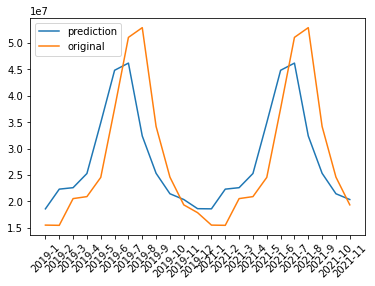

In [428]:
plt.plot(test.year_mon, test.prd, label = "prediction")
plt.plot(test.year_mon, test.test, label = "original")
# plt.plot(test.year_mon,[uper_thresh]*len(test.year_mon),label='75% quantile')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# baseline
sales = last_mon_sales + mon + year

In [309]:

X_train_base,y_train = X_train[['year','mon','sales_last_mon']],df_train.RentalCarGrossSales
X_test_base, y_test = X_test[['year','mon','sales_last_mon']],df_test.RentalCarGrossSales

In [310]:
enet_cv_base = ElasticNetCV(cv = 10).fit(X_train_base,y_train)
y_pred_base = enet_cv_base.predict(X_test_base)

In [336]:
np.mean(np.abs((y_test - y_pred_base) / y_test)) * 100

21.518809679229626

In [337]:
(y_test - y_pred_base).abs().sum() / y_test.sum()

0.22151565850012728

In [338]:
enet_cv_base.coef_

array([0.        , 0.        , 0.76202959])

In [323]:
cdf = df.copy()
cdf['base_predict'] = enet_cv_base.predict(cdf[['year','mon','sales_last_mon']])
cdf['remainder'] = cdf.RentalCarGrossSales - cdf.base_predict
cdf['year_mon'] = cdf.apply(lambda x: str(int(x.year))+'-'+str(int(x.mon)),axis=1)

In [327]:
cdf['flag'] = np.where(cdf.remainder>cdf.remainder.quantile(.75),1,0)

<AxesSubplot:xlabel='remainder', ylabel='Count'>

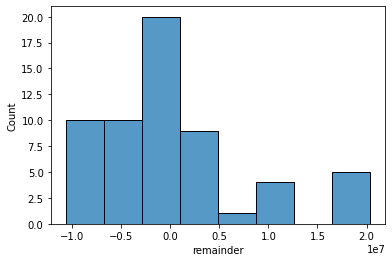

In [332]:
sns.histplot(cdf.remainder)

<AxesSubplot:xlabel='flag', ylabel='Count'>

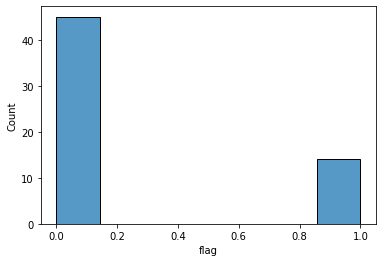

In [335]:
sns.histplot(cdf.flag)

<AxesSubplot:xlabel='flag', ylabel='RentalCarGrossSales'>

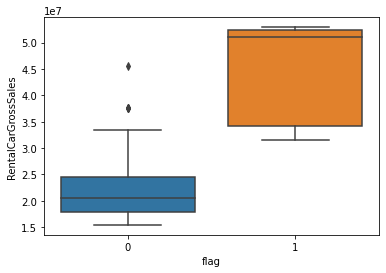

In [350]:
sns.boxplot(data = cdf, y='RentalCarGrossSales',x='flag')

## Feature Selection - classification

### feature importance 

In [388]:
Xc=cdf[feature_cols]
# Xc=np.nan_to_num(Xc.astype(np.float32))
yc=cdf.flag#.to_list()

[0.01386687 0.00077002 0.06339867 0.01922878 0.02130709 0.00703934
 0.00652532 0.00631947 0.00517136 0.00987545 0.00575808 0.00379938
 0.00795435 0.0057722  0.03324619 0.0125291  0.02728015 0.02252228
 0.00242399 0.00036605 0.01712196 0.01210316 0.00783845 0.06896823
 0.02739559 0.01685742 0.01868337 0.03765775 0.01717109 0.01988466
 0.02550497 0.05023689 0.017908   0.07457854 0.05180072 0.03573705
 0.01726479 0.02188457 0.13995503 0.04629361]


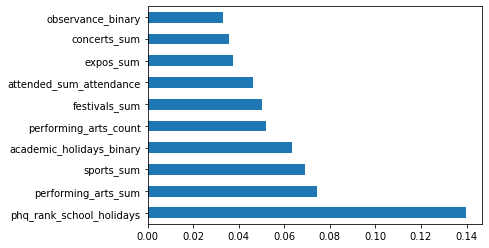

In [389]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xc,yc)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [415]:
feat_importances.sort_values(ascending=False).head(7)

phq_rank_school_holidays    0.139955
performing_arts_sum         0.074579
sports_sum                  0.068968
academic_holidays_binary    0.063399
performing_arts_count       0.051801
festivals_sum               0.050237
attended_sum_attendance     0.046294
dtype: float64

In [422]:
feat_imp_col = feat_importances.sort_values(ascending=False).head(7).index

### Univariate Selection

In [410]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
uni_test = SelectKBest(score_func=f_classif, k=4)
uni_fit = uni_test.fit(Xc, yc)

uni_col = uni_test.get_support(indices=True)
uni_featrures_new = Xc.iloc[:,uni_col]

# summarize scores
set_printoptions(precision=3)
print(uni_fit.scores_)
uni_features = uni_fit.transform(Xc)
# summarize selected features
print(uni_features[0:5,:])

[3.309e+00 5.636e-01 6.387e+00 1.813e-02 3.044e-01 8.892e-02 1.914e-03
 2.300e-01 9.171e-01 1.388e+00 1.807e+00 3.068e-02 3.217e+00 1.802e-02
 4.271e+00 3.403e+00 7.686e+00 7.543e+00 2.145e+00 1.160e+00 4.079e+00
 3.826e+00 2.121e+00 9.399e+00 2.167e-02 1.167e+00 1.827e-01 2.140e+00
 4.548e-01 1.486e+00 6.417e-01 9.833e+00 3.421e-01 7.937e+00 5.564e+00
 9.874e-01 1.308e-01 4.369e+00 2.222e+01 4.046e+00]
[[185598. 131211.  78387.      0.]
 [120106.  69627. 106119.      0.]
 [133716.  90807.  85252.      0.]
 [376391.  56910.  96628.      0.]
 [536834. 448796.  82231.      0.]]


In [412]:
uni_featrures_new.head()

sports_sum  festivals_sum  performing_arts_sum  phq_rank_school_holidays
4    185598.0       131211.0              78387.0                         0
3    120106.0        69627.0             106119.0                         0
7    133716.0        90807.0              85252.0                         0
0    376391.0        56910.0              96628.0                         0
8    536834.0       448796.0              82231.0                         0

In [404]:
Xc.shape

(59, 40)

In [405]:
uni_features.shape

(59, 4)

### recursive feature elimination

In [390]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(Xc, yc)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packag

Num Features: 3
Selected Features: [False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True False False
 False False False False]
Feature Ranking: [24 34 30 22  1 18 25  4 37  3 38 26  2  9 29 15 10 31 11 36 13 33 32 14
 16 12 35  1 28  5 21  7 27  1 19  6 17 23 20  8]


/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

# classification

In [358]:
feature_cols = non_zero_event_features.columns.to_list()[1:-2]

In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# testing two feature selection techniques

## Univariate selection
# uni_featrures_new

## Feature importance
# Xc[feat_imp_col]

X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(Xc[feat_imp_col], yc, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_ctrain, y_ctrain)

LogisticRegression(max_iter=200)

In [430]:
# Feature importance col prediction
y_cpred = logreg.predict(X_ctest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_ctest, y_ctest)))

Accuracy of logistic regression classifier on test set: 0.89


In [418]:
# univariate selection prediction
# y_cpred = logreg.predict(X_ctest)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_ctest, y_ctest)))

Accuracy of logistic regression classifier on test set: 0.78


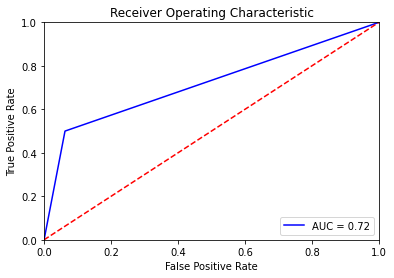

In [429]:
fpr, tpr, threshold = metrics.roc_curve(y_ctest, y_cpred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decomposition

In [24]:
from prophet import Prophet

In [30]:
pdf = frame[['year_mon','RentalCarGrossSales']]
pdf.columns = ['ds','y']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.5649
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       855.937   2.78531e-05       104.044       0.819       0.819      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       856.016   3.04203e-08       95.5455      0.8258      0.8258      215   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


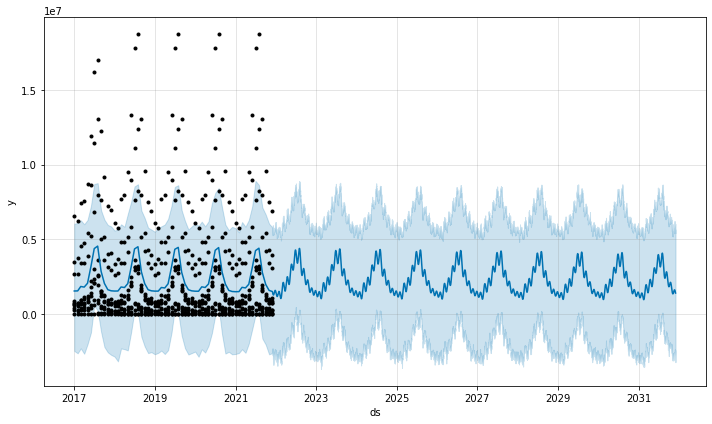

In [31]:
m = Prophet(seasonality_mode='multiplicative').fit(pdf)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

In [33]:
fcst

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2017-01-01  2.434869e+06 -2.472516e+06  6.049419e+06  2.434869e+06   
1    2017-02-01  2.433309e+06 -2.632239e+06  6.096118e+06  2.433309e+06   
2    2017-03-01  2.431901e+06 -2.302214e+06  6.276113e+06  2.431901e+06   
3    2017-04-01  2.430310e+06 -2.660852e+06  6.010897e+06  2.430310e+06   
4    2017-05-01  2.428771e+06 -2.030699e+06  6.295500e+06  2.428771e+06   
...         ...           ...           ...           ...           ...   
3707 2031-11-27  2.155667e+06 -2.616595e+06  5.605465e+06  2.154579e+06   
3708 2031-11-28  2.155616e+06 -2.405605e+06  5.955896e+06  2.154527e+06   
3709 2031-11-29  2.155565e+06 -2.518536e+06  6.045667e+06  2.154475e+06   
3710 2031-11-30  2.155513e+06 -3.226995e+06  5.419047e+06  2.154424e+06   
3711 2031-12-01  2.155462e+06 -2.614759e+06  5.652993e+06  2.154372e+06   

       trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0     2.434869e+06             -0.367159                   -0.367159   
1     2.433309e+06             -0.364030                   -0.364030   
2     2.431901e+06             -0.241986                   -0.241986   
3     2.430310e+06             -0.258424                   -0.258424   
4     2.428771e+06             -0.153310                   -0.153310   
...            ...                   ...                         ...   
3707  2.156706e+06             -0.285662                   -0.285662   
3708  2.156655e+06             -0.299622                   -0.299622   
3709  2.156604e+06             -0.315085                   -0.315085   
3710  2.156553e+06             -0.331613                   -0.331613   
3711  2.156502e+06             -0.348735                   -0.348735   

      multiplicative_terms_upper    yearly  yearly_lower  yearly_upper  \
0                      -0.367159 -0.367159     -0.367159     -0.367159   
1                      -0.364030 -0.364030     -0.364030     -0.364030   
2                      -0.241986 -0.241986     -0.241986     -0.241986   
3                      -0.258424 -0.258424     -0.258424     -0.258424   
4                      -0.153310 -0.153310     -0.153310     -0.153310   
...                          ...       ...           ...           ...   
3707                   -0.285662 -0.285662     -0.285662     -0.285662   
3708                   -0.299622 -0.299622     -0.299622     -0.299622   
3709                   -0.315085 -0.315085     -0.315085     -0.315085   
3710                   -0.331613 -0.331613     -0.331613     -0.331613   
3711                   -0.348735 -0.348735     -0.348735     -0.348735   

      additive_terms  additive_terms_lower  additive_terms_upper          yhat  
0                0.0                   0.0                   0.0  1.540885e+06  
1                0.0                   0.0                   0.0  1.547512e+06  
2                0.0                   0.0                   0.0  1.843415e+06  
3                0.0                   0.0                   0.0  1.802259e+06  
4                0.0                   0.0                   0.0  2.056416e+06  
...              ...                   ...                   ...           ...  
3707             0.0                   0.0                   0.0  1.539875e+06  
3708             0.0                   0.0                   0.0  1.509746e+06  
3709             0.0                   0.0                   0.0  1.476378e+06  
3710             0.0                   0.0                   0.0  1.440717e+06  
3711             0.0                   0.0                   0.0  1.403776e+06  

[3712 rows x 16 columns]

# Elastic net

In [168]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [196]:
# change sampling
X = df.loc[:,df.columns!='RentalCarGrossSales']
y = df.RentalCarGrossSales
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# enet_model = ElasticNet().fit(X_train, y_train)
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)
y_pred = enet_cv_model.predict(X_test)

In [197]:
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

30.52115834449063

In [200]:
(y_test - y_pred).abs().sum() / y_test.sum()

0.27118028778465825

In [224]:
coef = pd.DataFrame()
coef['feature'] = X.columns
coef['val'] = enet_cv_model.coef_

### dropped feature

In [239]:
coef[coef.val==0]

feature  val
0                         year  0.0
1                          mon  0.0
2        academic_exams_binary -0.0
3   academic_graduation_binary  0.0
4     academic_holidays_binary  0.0
6      academic_session_binary  0.0
7               attended_count -0.0
8             big_event_binary -0.0
10         demand_surge_binary -0.0
12       qdiscretized_att_bins -0.0
13         day_expo_attendance -0.0
15       short_expo_attendance  0.0
16           observance_binary -0.0
17      school_holidays_binary -0.0
19     baseball_attendance_bin  0.0
21   basketball_attendance_bin -0.0
23       soccer_attendance_bin -0.0
24       sports_attendance_bin -0.0
26                sports_count -0.0
28           conferences_count -0.0
30                 expos_count -0.0
32             community_count -0.0
34             festivals_count -0.0
36       performing_arts_count -0.0
38              concerts_count -0.0
39    phq_rank_public_holidays -0.0
40    phq_rank_school_holidays  0.0

### selected feature

In [229]:
a = coef[coef.val!=0].sort_values('val',ascending=False)
a

feature        val
33                festivals_sum  21.117767
18          baseball_attendance  15.104469
25                   sports_sum  13.918668
22            soccer_attendance   5.279198
5   academic_session_attendance   4.552482
29                    expos_sum  -0.018534
14          multiday_attendance  -0.187248
20        basketball_attendance  -0.627426
41      attended_sum_attendance  -2.420592
27              conferences_sum  -2.996913
37                 concerts_sum  -5.245782
11      large_events_attendance  -8.348773
31                community_sum -10.705813
35          performing_arts_sum -16.464289
9           cultural_attendance -16.833476

<AxesSubplot:xlabel='val', ylabel='feature'>

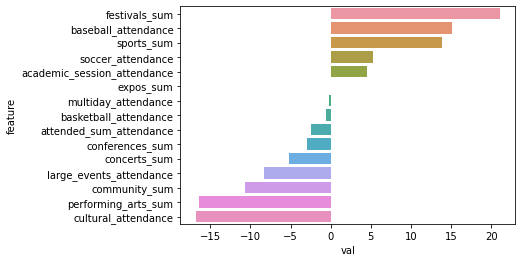

In [230]:
sns.barplot(data=a,x='val',y='feature')

In [198]:
test = X_test.copy()
test['prd'] = y_pred
test['test']=y_test
test.sort_values(['year','mon'],inplace=True)
test['year_mon']=test.apply(lambda x: str(int(x.year))+'-'+str(int(x.mon)),axis=1)


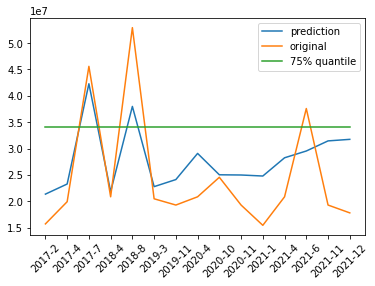

In [238]:
plt.plot(test.year_mon, test.prd, label = "prediction")
plt.plot(test.year_mon, test.test, label = "original")
plt.plot(test.year_mon,[uper_thresh]*len(test.year_mon),label='75% quantile')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from numpy import arange
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]#0,1,10
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: Conv

# Outliers predict

In [240]:
df.head()

year  RentalCarGrossSales  mon  academic_exams_binary  \
0  2017             19951807    4                    0.0   
1  2017             50539918    8                    0.0   
2  2017             17555169   12                    0.0   
3  2017             15746674    2                    0.0   
4  2017             16054808    1                    0.0   

   academic_graduation_binary  academic_holidays_binary  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   academic_session_attendance  academic_session_binary  attended_count  \
0                          0.0                      0.0             0.0   
1                          0.0                      0.0             0.0   
2                          0.0                      0.0             0.0   
3                          0.0                      0.0             0.0   
4                          0.0                      0.0             0.0   

   big_event_binary  cultural_attendance  demand_surge_binary  \
0               0.0                  0.0                  0.0   
1               0.0                  0.0                  0.0   
2               0.0                  0.0                  0.0   
3               0.0                  0.0                  0.0   
4               0.0                  0.0                  0.0   

   large_events_attendance  qdiscretized_att_bins  day_expo_attendance  \
0                      0.0                      0                  0.0   
1                      0.0                      0                  0.0   
2                      0.0                      0                  0.0   
3                      0.0                      0                  0.0   
4                      0.0                      0                  0.0   

   multiday_attendance  short_expo_attendance  observance_binary  \
0                  0.0                    0.0                0.0   
1                  0.0                    0.0                0.0   
2                  0.0                    0.0                0.0   
3                  0.0                    0.0                0.0   
4                  0.0                    0.0                0.0   

   school_holidays_binary  baseball_attendance  baseball_attendance_bin  \
0                     0.0                  0.0                        0   
1                     0.0                  0.0                        0   
2                     0.0                  0.0                        0   
3                     0.0                  0.0                        0   
4                     0.0                  0.0                        0   

   basketball_attendance  basketball_attendance_bin  soccer_attendance  \
0                    0.0                          0                0.0   
1                    0.0                          0                0.0   
2                    0.0                          0                0.0   
3                    0.0                          0                0.0   
4                    0.0                          0                0.0   

   soccer_attendance_bin  sports_attendance_bin  sports_sum  sports_count  \
0                      0                      0    376391.0          39.0   
1                      0                      0    577996.0          27.0   
2                      0                      0    336534.0          28.0   
3                      0                      0    120106.0          12.0   
4                      0                      0    185598.0          16.0   

   conferences_sum  conferences_count  expos_sum  expos_count  community_sum  \
0          77006.0               65.0    34759.0         21.0        66453.0   
1          21854.0               96.0    29267.0         15.0       1224

2017
2018
2019
2020
2021


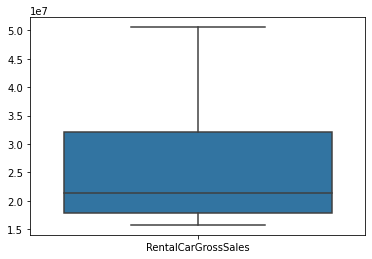

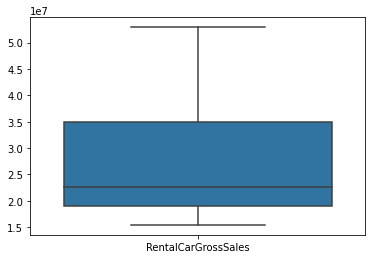

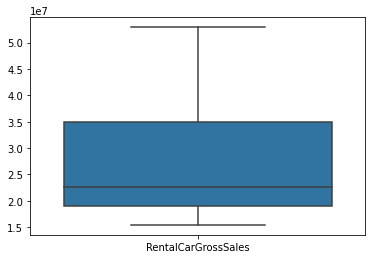

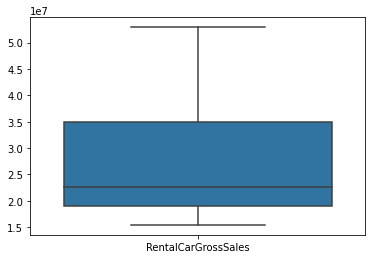

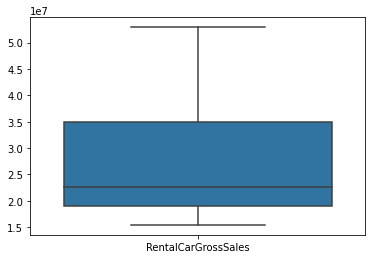

In [247]:
for year in df.year.unique():
    print(year)
    print(data=df[df.year=year]['RentalCarGrossSales'])
    plt.figure()
    sns.boxplot(data=df[df.year==year][['RentalCarGrossSales']])